<a href="https://colab.research.google.com/github/thaislin0/Modelos-de-Machine-Learning/blob/main/%C3%81rvore_de_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo Árvore de Decisão
Objetivo da análise: dado as variáveis do clima de um dia, por exemplo, se está ensolarado ou nublado ou frio ou quente, prever quantos jogadores irão jogar tênis. Iremos utilizar as bibliotecas pandas e scikit learn. Além disso, o modelo de previsão será a Árvore de Decisão.

In [19]:
# Importação da biblioteca pandas com o apelido pd 
import pandas as pd

In [20]:
# Criação de uma variável com a função de leitura de excel e o caminho do arquivo
base = pd.read_excel('/content/jogadores.xlsx')

In [21]:
# Verificação de quantas linhas e colunas há na base de dados
base.shape

(14, 8)

In [22]:
# Verificação das cinco primeiras linhas da base. A função head() pode ser utilizada com qualquer número que desejar, sendo que 5 é o padrão
base.head()

,Unnamed: 0,Aspecto_Nublado,Aspecto_Sol,Temperatura_Frio,Temperatura_Quente,Umidade_Normal,Vento_Sim,Total de jogadores
0,0,0,1,0,1,0,0,25
1,1,0,1,0,1,0,1,30
2,2,1,0,0,1,0,0,46
3,3,0,0,0,0,0,0,45
4,4,0,0,1,0,1,0,52


In [23]:
# Remoção da coluna 'Unnamed: 0' pois apresentava dados desnecessários
del base['Unnamed: 0']

In [24]:
# x: seleção de todas as linhas e colunas, menos a última, pois ela é a coluna que nosso modelo irá tentar prever
x = base.iloc[:, :-1]

In [25]:
#y: selecção de todas as linhas, porém apenas a última coluna, pois ela servirá como treinamento para o modelo
y = base.iloc[:, -1]

In [26]:
# Verificação da variável "x"
x

,Aspecto_Nublado,Aspecto_Sol,Temperatura_Frio,Temperatura_Quente,Umidade_Normal,Vento_Sim
0,0,1,0,1,0,0
1,0,1,0,1,0,1
2,1,0,0,1,0,0
3,0,0,0,0,0,0
4,0,0,1,0,1,0
5,0,0,1,0,1,1
6,1,0,1,0,1,1
7,0,1,0,0,0,0
8,0,1,1,0,1,0
9,0,0,0,0,1,0


In [27]:
# Verificação da variável "y"
y

0     25
1     30
2     46
3     45
4     52
5     23
6     43
7     35
8     38
9     46
10    48
11    52
12    44
13    30
Name: Total de jogadores, dtype: int64

# Modelo Árvore de Regressão
As árvores de regressão são usadas quando a variável dependente é contínua. As árvores de classificação são usadas quando a variável dependente é categórica. No caso da árvore de regressão, o valor obtido pelos nós de término nos dados de treinamento é o valor médio das suas observações.

Confira mais detalhes em: https://www.vooo.pro/insights/um-tutorial-completo-sobre-a-modelagem-baseada-em-tree-arvore-do-zero-em-r-python/#:~:text=As%20%C3%A1rvores%20de%20regress%C3%A3o%20s%C3%A3o,valor%20m%C3%A9dio%20das%20suas%20observa%C3%A7%C3%B5es.

In [28]:
# Importando do sklearn o modelo DecisionTreeClassifier e o módulo tree para gerar o gráfico ao final
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [29]:
# Atribuição de uma variável à função do DecisionTreeClassifier()
modelo_tree = DecisionTreeRegressor(min_samples_leaf=2)

In [30]:
# Treinamento do modelo com as variáveis x e y
modelo_tree.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [33]:
# Criando uma amostra dos dados originais para teste do modelo. Neste caso, o total escolhido foi "25"
amostra = base.sample()

In [34]:
amostra

,Aspecto_Nublado,Aspecto_Sol,Temperatura_Frio,Temperatura_Quente,Umidade_Normal,Vento_Sim,Total de jogadores
0,0,1,0,1,0,0,25


In [36]:
# Teste do modelo com a amostra. O modelo trouxe o número "27.5" e a amostra foi de "25".
modelo_tree.predict(amostra.iloc[:, :-1])

array([27.5])

In [38]:
# Teste do modelo com novos dados sendo inseridos. Cada valor corresponde a uma coluna. Existiriam 43.5 jogadores.
modelo_tree.predict([[1,0,1,0,1,1]])

array([43.5])

In [39]:
# Importação das biblioteca matplotlib para a visualização da Árvore de Regressão
import matplotlib.pyplot as plt


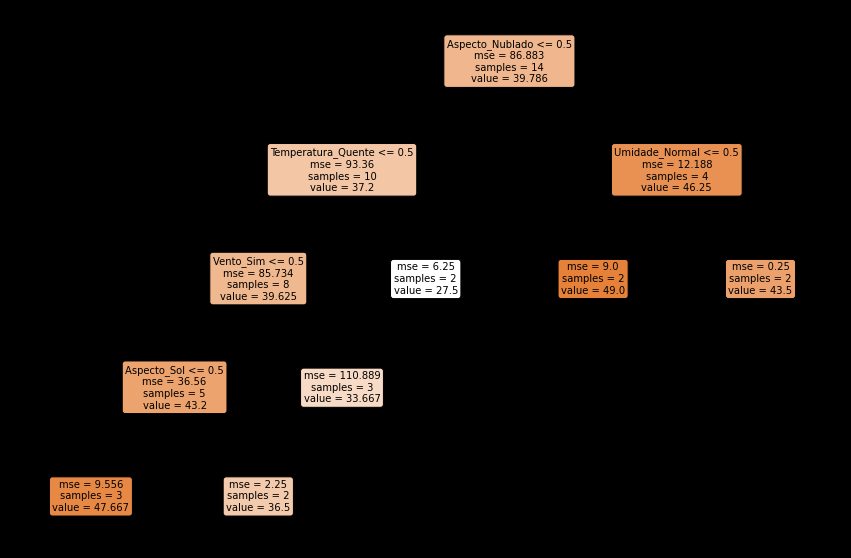

In [40]:
# Criação da figura com as variáveis necessárias
fig, ax = plt.subplots(figsize=(15, 10), facecolor='k')
tree.plot_tree(modelo_tree, 
               ax=ax,
               fontsize=10,
               rounded=True,
               filled=True,
               feature_names=x.columns,
               class_names=y.unique())

plt.show()

# Resumo
Primeiro, importamos as bibliotecas necessárias para a análise e os dados e iniciamos uma visualização e tratamento simples desses dados. Em seguida, importamos a biblioteca de Machine Learning (sklearn) com o modelo DecisionTreeRegressor.

Após, foi feito o treinamento do modelo e alguns testes de previsão. O modelo acertou corretamente o teste.

Bibliotecas utilziadas nessa análise:

pandas: https://pandas.pydata.org/ scikit-learn: https://scikit-learn.org/stable/